# <center> ML-6. Отбор и селекция признаков
---

### 2. Способы представления данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx')
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [4]:
data.describe()

,price,year,condition,cylinders,odometer,lat,long,weather
count,7017.000000,7017.000000,7017.000000,7017.000000,7.017000e+03,7017.000000,7017.000000,6837.000000
mean,15121.549523,2007.869745,2.598689,7.374662,1.199787e+05,39.550144,-91.903404,52.142899
std,11765.423119,6.975329,0.703662,0.942928,8.992216e+04,5.745409,14.030710,7.954830
min,1.000000,1957.000000,0.000000,3.000000,0.000000e+00,-2.508807,-151.055832,29.000000
25%,5995.000000,2004.000000,2.000000,6.000000,7.328500e+04,35.661076,-95.937145,45.000000
50%,12750.000000,2010.000000,3.000000,8.000000,1.180000e+05,40.335245,-88.168416,51.000000
75%,21995.000000,2013.000000,3.000000,8.000000,1.578040e+05,43.582100,-82.706300,59.000000
max,299500.000000,2018.000000,5.000000,10.000000,2.490000e+06,77.617682,-5.377999,71.000000


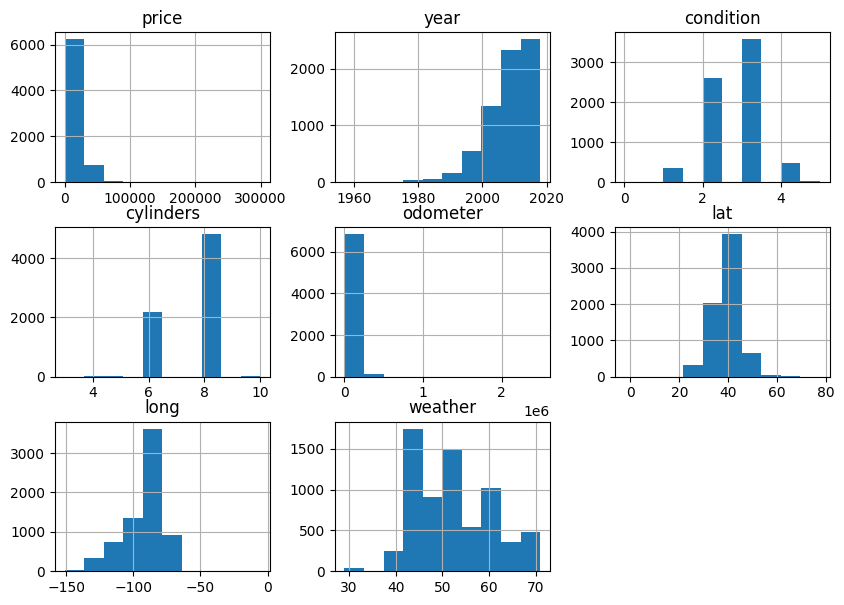

In [5]:
data.hist(figsize=(10, 7));

In [6]:
data.value_counts()

price  year  condition  cylinders  odometer  title_status  transmission  drive  size       lat        long        weather
12488  2010  2          8          144570    clean         automatic     4wd    full-size  42.892121  -85.665539  45.0       23
11977  2008  3          8          171488    clean         automatic     4wd    mid-size   44.873130  -87.895680  45.0       21
16995  2002  2          8          65336     clean         automatic     rwd    full-size  33.711509  -78.909582  60.0       20
9550   2006  3          8          168942    clean         automatic     4wd    mid-size   44.873130  -87.895680  45.0       19
23800  2014  3          8          93580     clean         automatic     4wd    full-size  33.066044  -89.593906  61.0       15
                                                                                                                             ..
6999   2004  3          8          122138    clean         automatic     rwd    full-size  27.873066  -82.7867

---
### 3. Кодирование признаков

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
y = data['price']
x = data.drop(columns='price')

```Python
lr = LinearRegression()
lr.fit(x,y)
```
Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

In [9]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [10]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


In [11]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


In [12]:
# Задание 3.7
# Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)
data_new = pd.concat([data, data_onehot], axis=1)
data_new.drop(columns_to_change, axis=1, inplace=True)
data_new.shape

(7017, 30)

---
### 4. Обработка пропусков и выбросов

##### РАБОТА С ПРОПУСКАМИ

In [13]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [14]:
# Задание 4.2
# Какая доля строк в датасете останется, если убрать пропуски в столбце size? Ответ округлите до двух знаков после точки-разделителя.
round(data[~data['size'].isna()].shape[0] / data['size'].shape[0], 2)

0.78

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [16]:
x = x.dropna()

In [17]:
y = y.iloc[x.index]

In [18]:
x.shape[0] == y.shape[0]

True

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [21]:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

In [22]:
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

In [23]:
columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

In [24]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

In [25]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

In [26]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [27]:
lr_model = LinearRegression()

In [28]:
lr_model.fit(X_train_new, y_train)

LinearRegression()

In [29]:
y_train_predict = lr_model.predict(X_train_new)

In [30]:
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

# Train R^2: 0.647
# Test R^2: 0.693

Train R^2: 0.647
Test R^2: 0.693


 Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

In [31]:
data = pd.read_excel('data/data_ford_price.xlsx')
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [32]:
import numpy as np
 
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

In [33]:
X_train['drive'].value_counts(True).head(1)

# 4wd   0.755447
# Name: drive, dtype: float64

drive
4wd    0.738406
Name: proportion, dtype: float64

In [34]:
X_train['size'].value_counts(True).head(1)

# full-size   0.877418
# Name: size, dtype: float64

size
full-size    0.841164
Name: proportion, dtype: float64

In [35]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [36]:
X_train_fill_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_fill_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)

X_train_fill_onehot_df = pd.DataFrame(X_train_fill_onehot, columns=columns)
X_test_fill_onehot_df = pd.DataFrame(X_test_fill_onehot, columns=columns)

X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1) 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

X_train_new_2 = pd.concat([X_train, X_train_fill_onehot_df], axis=1)
X_test_new_2 = pd.concat([X_test, X_test_fill_onehot_df], axis=1)
 
X_train_new_2 = X_train_new_2.drop(columns=columns_to_change)
X_test_new_2 = X_test_new_2.drop(columns=columns_to_change)

lr_model_2 = LinearRegression()
lr_model.fit(X_train_new_2, y_train)

y_train_predict_2 = lr_model.predict(X_train_new_2)
y_test_predict_2 = lr_model.predict(X_test_new_2)

print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict_2)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict_2)))
# Train R^2: 0.649
# Test R^2: 0.465

Train R^2: 0.649
Test R^2: 0.465


In [37]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data = x.copy()

# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]
# И удалим эти строчки из таблицы
data.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)
y_pred

array([[ 40.91435555],
       [ 40.7637233 ],
       [ 39.74866152],
       [ 41.2755305 ],
       [ 40.31791932],
       [ 41.10796547],
       [ 41.15337846],
       [ 39.94866488],
       [ 41.10796547],
       [ 40.7217165 ],
       [ 40.18904454],
       [ 91.62094167],
       [ 41.12549856],
       [ 41.33052316],
       [ 39.66827354],
       [ 40.91435555],
       [ 40.77287826],
       [ 40.84208674],
       [ 41.10796547],
       [ 41.02118034],
       [ 40.31791932],
       [ 41.30309209],
       [ 40.77645269],
       [ 40.75842615],
       [ 40.61605044],
       [ 40.79031628],
       [ 40.7701239 ],
       [ 39.78723017],
       [ 41.27231621],
       [ 39.77492057],
       [ 40.7637233 ],
       [ 40.7701239 ],
       [ 41.10796547],
       [ 39.68313064],
       [ 40.12277414],
       [ 39.7873657 ],
       [ 41.07798631],
       [ 41.06812063],
       [ 40.7637233 ],
       [ 40.90194049],
       [ 41.10796547],
       [ 70.85737739],
       [ 30.44339508],
       [ 40

In [38]:
# Задание 4.5 (на самопроверку)
# Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. 
# Обратите внимание на то, какой тип модели нужен (классификация или регрессия) в зависимости от типа признака.
# Попробуйте выполнить задание самостоятельно. При затруднениях вы можете посмотреть решение в ноутбуке в начале юнита.
from sklearn.linear_model import LogisticRegression

for i, ni in enumerate(test_data.index):
    x.loc[ni, 'weather'] = y_pred[i]

data = x.copy()
test_data = data[data['size'].isnull()]
data.dropna(inplace=True)

y_train = data['size']
X_train = data.drop(['size','drive'], axis=1)
X_test = test_data.drop(['size','drive'], axis=1)

one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

model = LogisticRegression(random_state=42)
model.fit(X_train_new, y_train)

y_pred = model.predict(X_test_new)

for i, ni in enumerate(test_data.index):
    x.loc[ni, 'size'] = y_pred[i]

x.info()

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          7017 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


##### РАБОТА С ВЫБРОСАМИ

In [39]:
data = pd.read_excel('data/data_ford_price.xlsx')
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long', 'weather']]
data.dropna(inplace = True)
 
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 4682.957

MAE: 4682.957


Первый алгоритм, который мы применим, — **Isolation Forest**, или **iForest**. Это алгоритм обнаружения аномалий на основе дерева.

In [41]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
 
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (4306, 6) (4306,)
# MAE: 4456.540

(4309, 6) (4309,)
MAE: 4464.914


Следующий метод — **Local Outlier Factor**, или **LOF**. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

In [42]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (3698, 6) (3698,)
# MAE: 4490.993

(3992, 6) (3992,)
MAE: 4475.811


Напоследок рассмотрим **Minimum Covariance Determinant**, или **MCD**.

In [43]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (3587, 6) (3587,)
# MAE: 4489.613

(3952, 6) (3952,)
MAE: 4476.855


---
### 5. Масштабирование признаков

In [44]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [45]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 3.041

MAE: 3.041


In [46]:
data['price']

0       43900
1       15490
2        2495
3        1300
5        6995
        ...  
7012    22500
7013     5975
7014     9999
7015    10900
7016    18000
Name: price, Length: 6837, dtype: int64

In [47]:
# Задание 5.2
# Отмасштабируйте признак price с помощью RobustScaler.
# В качестве ответа запишите результат выполнения кода data['price'][1]. Ответ округлите до двух знаков после точки-разделителя.
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
data['price'] = r_scaler.fit_transform(data['price'].values.reshape(-1, 1))
round(data['price'][1], 2)

0.19

---
### 6. Трансформации распределений признаков

##### QUANTILE TRANSFORMER

In [48]:
data = pd.read_excel('data/data_ford_price.xlsx')

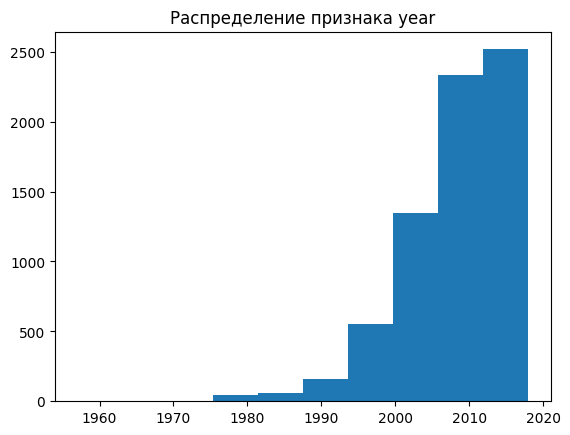

In [49]:
import matplotlib.pyplot as plt
 
plt.hist(data.year)
plt.title('Распределение признака year');

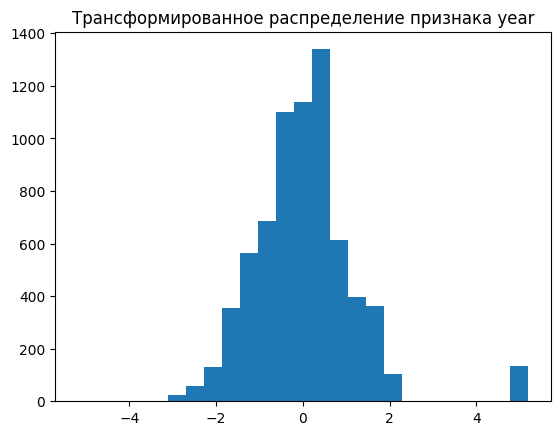

In [50]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

In [51]:
# Задание 6.1
# Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? 
# Ответ округлите до второго знака после точки-разделителя.
quantile_2 = QuantileTransformer(output_distribution='uniform')
data_transformed_2 = quantile_2.fit_transform(data[['condition', 'cylinders']])
round(data_transformed_2[0][0], 2)

0.96

##### LOG TRANSFORM

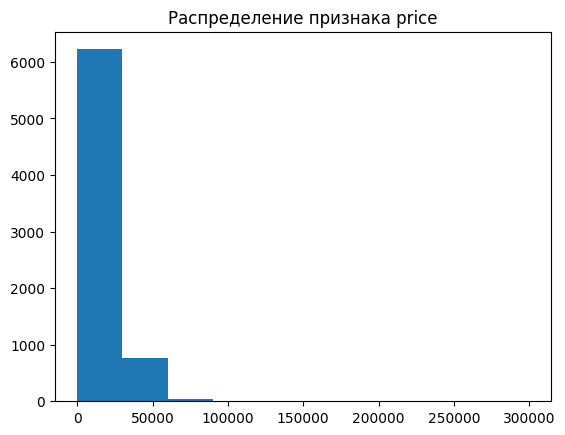

In [52]:
plt.hist(data.price)
plt.title('Распределение признака price');

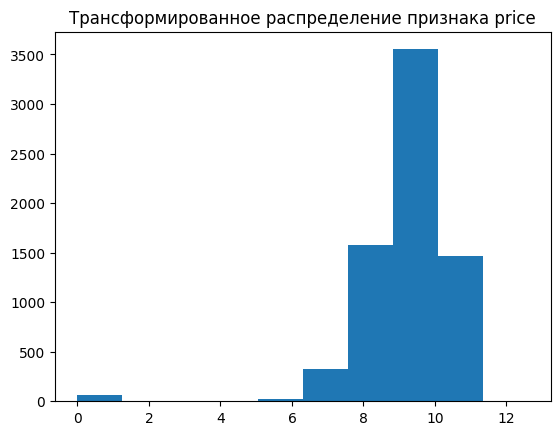

In [53]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [54]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [55]:
# Задание 6.3
# Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.
round(price_data['transformed_price'].iloc[-1], 2)

9.8

##### POWER TRANSFORMER SCALER

In [56]:
from sklearn.preprocessing import PowerTransformer
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [57]:
data_box_cox

,transformed_price,transformed_year
0,1.910471,1.302970
1,0.270352,0.096260
2,-1.369721,-0.932327
3,-1.718754,-1.197200
4,0.132932,0.257090
...,...,...
7012,0.780988,1.118588
7013,-0.733027,-0.511569
7014,-0.238492,-0.364778
7015,-0.145148,0.421629


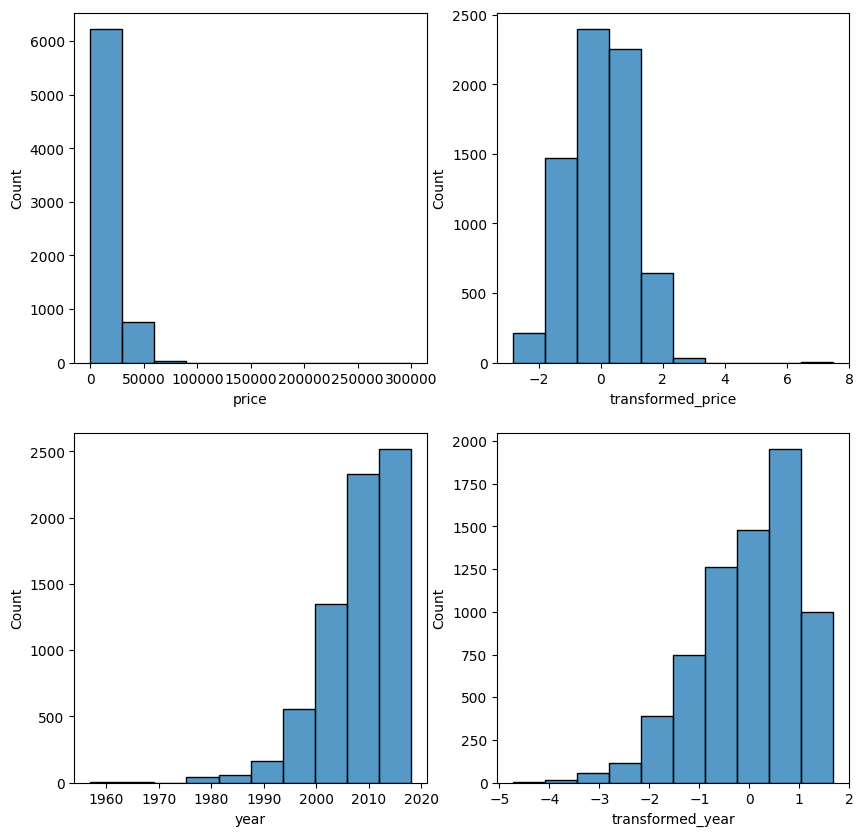

In [66]:
import seaborn as sns
plots = [data['price'], data_box_cox['transformed_price'], data['year'], data_box_cox['transformed_year']]
i = 0
j = 0
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for plot in plots:
    sns.histplot(plot, ax=axes[j][i], bins=10)
    i += 1
    if i > 1:
        i = 0
        j += 1


---
### 7. Даты и расстояния

In [68]:
from geopy.geocoders import Nominatim

In [69]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [70]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


In [71]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

In [74]:
# Задание 7.2
# Найдите почтовый код шестого объекта выборки.
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
address = location.raw['address']
address['postcode']

'97216'

```Python
!pip install geopandas
!pip install shapely
```

C:\Users\Blooodniy\AppData\Local\Temp\ipykernel_4412\503307362.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


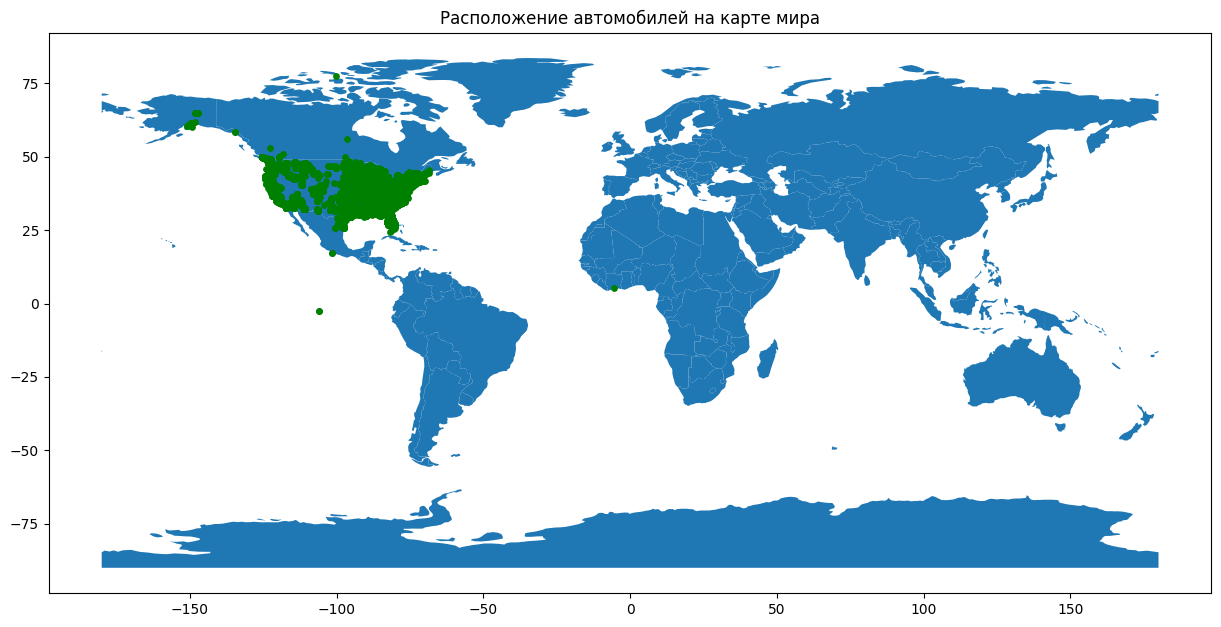

In [75]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
 
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

In [76]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

---
### 8. Отбор признаков: мотивация